In [1]:
import os

In [2]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler


In [3]:

df = pd.read_csv('last_clean.csv',encoding="cp949")

In [4]:
df[['사고']]

,사고
0,1
1,1
2,1
3,0
4,1
...,...
28935,0
28936,0
28937,1
28938,1


In [5]:
y_data = df[['사고']]
len(y_data)

28940

In [6]:
x_data = df.loc[:, ['유의파고','파향','최대파주기','풍속','풍향']]
x_data = x_data.astype(np.float32)
len(x_data)

28940

In [7]:
from sklearn.preprocessing import OneHotEncoder

In [8]:
scaler = StandardScaler()
x_data_scaled = scaler.fit_transform(x_data)


In [9]:
# encoder = OneHotEncoder()
# y_data_encoded = encoder.fit_transform(y_data).toarray()

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x_data_scaled, y_data, test_size=0.2, random_state=2021)



In [11]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=2021)



In [12]:
type(x_train)

numpy.ndarray

In [13]:
type(y_train)

pandas.core.frame.DataFrame

In [14]:
# y_train=y_train.astype(int)

In [15]:
type(x_train[0][0])

numpy.float32

In [16]:
import numpy
y_train=y_train.astype(numpy.int64)

In [17]:
y_train

,사고
9520,1
11674,1
8237,0
1559,0
660,1
...,...
22946,0
27341,0
4252,0
373,0


In [18]:
from tensorflow.keras import optimizers
model = Sequential()

model.add(Dense(1, input_dim=5, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [19]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop=EarlyStopping(monitor='val_loss',patience=7,verbose=1)
best=ModelCheckpoint('best_model',monitor='val_loss',mode='min',verbose=1)

history=model.fit(
    x_train,
    y_train,
    epochs=30,
    batch_size = 8,
    verbose=1,
    validation_data=(x_val, y_val), 
    callbacks=[early_stop,best]
#     callbacks=[best]
    
)

Epoch 1/30
2207/2316 [===========================>..] - ETA: 0s - loss: 0.6777 - acc: 0.6117
Epoch 00001: saving model to best_model
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: best_model/assets
2316/2316 [==============================] - 2s 764us/step - loss: 0.6747 - acc: 0.6156 - val_loss: 0.6358 - val_acc: 0.6634
Epoch 2/30
2229/2316 [===========================>..] - ETA: 0s - loss: 0.6101 - acc: 0.6845
Epoch 00002: saving model to best_model
INFO:tensorflow:Assets written to: best_model/assets
2316/2316 [==============================] - 2s 712us/step - loss: 0.6096 - acc: 0.6848 - val_loss: 0.6150 - val_acc: 0.6897
Epoch 3/30
2284/2316 [============================>.] - ETA: 0s - loss: 0.5956 - acc: 0.7017
Epoch 00003: saving model to best_model
INFO:tensor

Epoch 25/30
2210/2316 [===========================>..] - ETA: 0s - loss: 0.5861 - acc: 0.7124
Epoch 00025: saving model to best_model
INFO:tensorflow:Assets written to: best_model/assets
2316/2316 [==============================] - 1s 634us/step - loss: 0.5854 - acc: 0.7129 - val_loss: 0.6010 - val_acc: 0.7078
Epoch 00025: early stopping


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [21]:
from tensorflow.keras.models import load_model
loaded_model = load_model('best_model')
print('\n테스트 정확도 : %.4f'%(loaded_model.evaluate(x_test,y_test)[1]))

181/181 [==============================] - 0s 395us/step - loss: 0.6021 - acc: 0.7009

테스트 정확도 : 0.7009


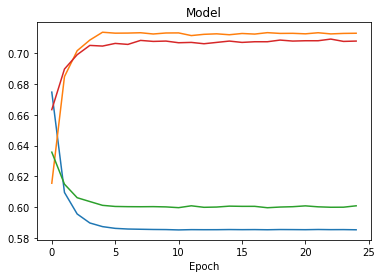

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['acc'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_acc'])
plt.title('Model')
plt.xlabel('Epoch')


plt.show()